<a href="https://colab.research.google.com/github/Julia-Rawlinson/ai-research-project/blob/main/Research_Project_Julia_Rawlinson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install ucimlrepo
!pip install pycaret
from ucimlrepo import fetch_ucirepo
import pycaret
import pandas as pd
from pycaret.classification import *
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 86.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 68.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 15.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 55.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 76.9 MB/s e

In [ ]:
# fetch dataset
abalone = fetch_ucirepo(id=1)

# load dataset
abalone_data = abalone.data.original
abalone_data

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


Exploratory Data Analysis

The goal is to determine the percentage of each sex class (M, F, I), and the number of missing values.

In [ ]:
# Category Percentages
percentages = ((abalone_data['Sex'].value_counts()) / len(abalone_data)) * 100

# Missing Values
missing_values = abalone_data.isna().sum()

# Results
print("Category Percentages in 'Sex' column:")
for category, percentage in percentages.items():
    print(f"{category}: {percentage:.2f}%")

print("\nMissing Values in Each Column:")
for column, value in missing_values.items():
    print(f"{column}: {value}")


Category Percentages in 'Sex' column:
M: 36.58%
I: 32.13%
F: 31.29%

Missing Values in Each Column:
Sex: 0
Length: 0
Diameter: 0
Height: 0
Whole_weight: 0
Shucked_weight: 0
Viscera_weight: 0
Shell_weight: 0
Rings: 0


Feature Engineering

In [1]:
# Replace zero values in 'Height' and 'Diameter' columns to avoid division by zero
abalone_data['Height'].replace(0, abalone_data['Height'].mean(), inplace=True)
abalone_data['Diameter'].replace(0, abalone_data['Diameter'].mean(), inplace=True)

# Create ratios of weights to dimensions
abalone_data['Length_to_Height'] = abalone_data['Length'] / abalone_data['Height']
abalone_data['Length_to_Diameter'] = abalone_data['Length'] / abalone_data['Diameter']
abalone_data['Height_to_Diameter'] = abalone_data['Height'] / abalone_data['Diameter']

numerical_features = abalone_data.drop('Sex', axis=1).columns

# Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(abalone_data[numerical_features])

# Transform polynomial features back into a DataFrame
columns = poly.get_feature_names_out(numerical_features)
abalone_data_poly = pd.DataFrame(poly_features, columns=columns)

# Scale the polynomial features
scaler = StandardScaler()
abalone_data_scaled = scaler.fit_transform(abalone_data_poly)

abalone_data_scaled = pd.DataFrame(abalone_data_scaled, columns=columns)
abalone_data_scaled['Sex'] = abalone_data['Sex'].values

NameError: ignored

Setup

Initialize the training environment and transformation pipeline

In [ ]:
# init setup
s = setup(data=abalone_data_scaled,
          target='Sex',
          session_id=123,
          normalize=True,
          transformation=True,
          remove_multicollinearity=True,
          multicollinearity_threshold=0.95)

,Description,Value
0,Session id,123
1,Target,Sex
2,Target type,Multiclass
3,Target mapping,"F: 0, I: 1, M: 2"
4,Original data shape,"(4177, 78)"
5,Transformed data shape,"(4177, 13)"
6,Transformed train set shape,"(2923, 13)"
7,Transformed test set shape,"(1254, 13)"
8,Numeric features,77
9,Preprocess,True


Compare Models

Train and evaluate estimators using cross validation

In [ ]:
# compare baseline models
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.5607,0.7541,0.5607,0.5581,0.5509,0.3344,0.3402,0.2600
lr,Logistic Regression,0.5532,0.7540,0.5532,0.5460,0.5438,0.3249,0.3285,1.0250
ridge,Ridge Classifier,0.5494,0.0000,0.5494,0.5357,0.5311,0.3190,0.3255,0.3040
qda,Quadratic Discriminant Analysis,0.5361,0.7244,0.5361,0.5464,0.5217,0.2964,0.3102,0.3300
svm,SVM - Linear Kernel,0.5300,0.0000,0.5300,0.5189,0.4918,0.2895,0.3078,0.4520
ada,Ada Boost Classifier,0.5227,0.7259,0.5227,0.5127,0.5136,0.2817,0.2839,0.4870
nb,Naive Bayes,0.5190,0.7261,0.5190,0.5072,0.5059,0.2822,0.2864,0.2550
gbc,Gradient Boosting Classifier,0.5159,0.7320,0.5159,0.5042,0.5063,0.2694,0.2716,3.1320
rf,Random Forest Classifier,0.5091,0.7116,0.5091,0.5055,0.5065,0.2611,0.2616,1.1110
et,Extra Trees Classifier,0.5050,0.7056,0.5050,0.5009,0.5019,0.2554,0.2559,0.8820


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
tuned_model = tune_model(best_model, optimize='AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5631,0.7561,0.5631,0.5531,0.5474,0.3383,0.3451
1,0.5563,0.7784,0.5563,0.5739,0.5503,0.3256,0.3354
2,0.5461,0.7505,0.5461,0.5546,0.5385,0.3103,0.3185
3,0.6027,0.7570,0.6027,0.5934,0.5852,0.3988,0.4067
4,0.5582,0.7470,0.5582,0.5450,0.5309,0.3280,0.3408
5,0.5205,0.7432,0.5205,0.5049,0.5057,0.2749,0.2788
6,0.5342,0.7390,0.5342,0.5290,0.5243,0.2934,0.2986
7,0.5822,0.7642,0.5822,0.5691,0.5655,0.3670,0.3738
8,0.5582,0.7383,0.5582,0.5608,0.5445,0.3284,0.3386


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Analyze Model

Analyze the performance of the trained model

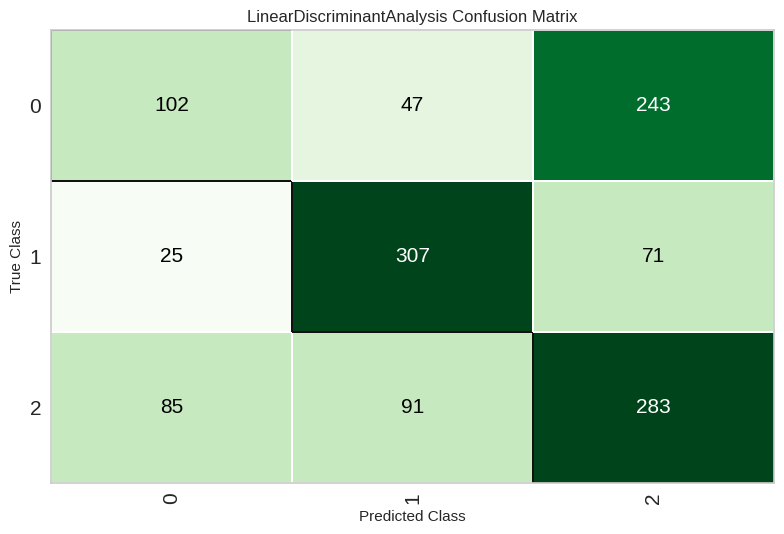

In [ ]:
# plot confusion matrix
plot_model(tuned_model, plot = 'confusion_matrix')

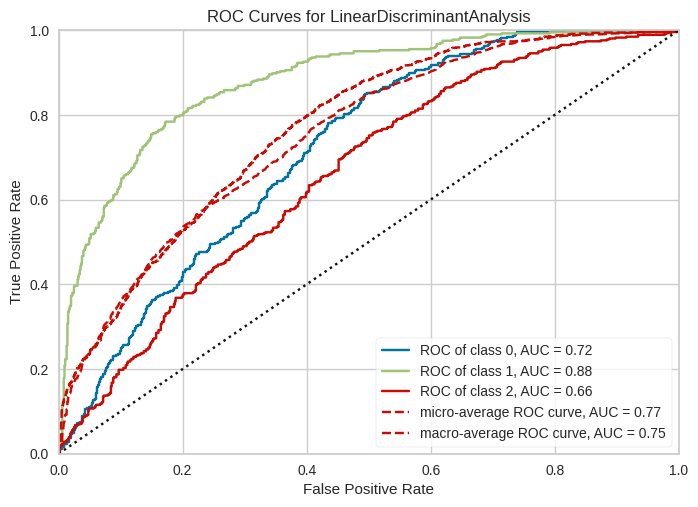

In [ ]:
# plot AUC
plot_model(tuned_model, plot = 'auc')

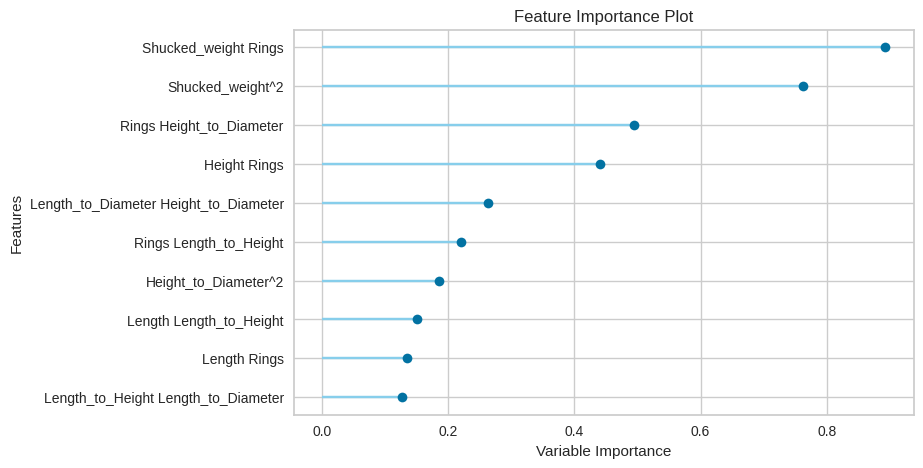

In [ ]:
# plot feature importance
plot_model(tuned_model, plot = 'feature')

Prediction



In [ ]:
# predict on test set
holdout_pred = predict_model(tuned_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.5518,0.7486,0.5518,0.5456,0.5345,0.3198,0.3284


In [ ]:
# show predictions df
holdout_pred.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Length_to_Height,Length_to_Diameter,...,Rings Height_to_Diameter,Length_to_Height^2,Length_to_Height Length_to_Diameter,Length_to_Height Height_to_Diameter,Length_to_Diameter^2,Length_to_Diameter Height_to_Diameter,Height_to_Diameter^2,Sex,prediction_label,prediction_score
1948,0.924461,1.079522,0.609363,0.816302,0.658443,1.066653,0.823855,0.020571,-0.004606,-0.996813,...,-0.163296,-0.023119,-0.221591,-0.996813,-0.958656,-0.555466,-0.112554,M,M,0.4813
956,-0.241443,-0.079426,-0.109881,-0.446112,-0.393660,-0.338442,-0.681325,-0.910013,-0.236230,-0.920781,...,-0.789406,-0.072168,-0.413301,-0.920781,-0.888750,-0.285306,-0.041391,M,I,0.5410
1341,0.508067,0.827576,1.088860,0.698015,0.732789,0.665197,0.690940,0.020571,-0.878932,-1.659419,...,0.262077,-0.195840,-1.116816,-1.659419,-1.557121,0.110043,0.139644,M,M,0.5048
821,-1.282428,-1.339151,0.009993,-1.238435,-1.182174,-1.232593,-1.274057,-1.220208,-1.540489,0.907159,...,-0.274425,-0.304054,-1.319298,0.907159,0.868415,2.908006,0.876897,I,I,0.7532
569,-0.949313,-0.885650,-0.589378,-0.900907,-0.875780,-0.730774,-1.008225,0.330765,-0.365469,-0.179984,...,0.394248,-0.098505,-0.385211,-0.179984,-0.194337,0.225918,0.054973,F,M,0.4228


In [ ]:
# copy data and drop Sex variable
new_data = abalone_data.copy()
new_data.drop('Sex', axis=1, inplace=True)

# Apply polynomial transformation and scaling to new_data
new_data_poly = poly.transform(new_data)
new_data_scaled = scaler.transform(new_data_poly)
new_data_scaled_df = pd.DataFrame(new_data_scaled, columns=poly.get_feature_names_out())

new_data_scaled_df.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Length_to_Height,Length_to_Diameter,...,Rings^2,Rings Length_to_Height,Rings Length_to_Diameter,Rings Height_to_Diameter,Length_to_Height^2,Length_to_Height Length_to_Diameter,Length_to_Height Height_to_Diameter,Length_to_Diameter^2,Length_to_Diameter Height_to_Diameter,Height_to_Diameter^2
0,-0.574558,-0.432149,-1.068874,-0.641898,-0.607685,-0.726212,-0.638217,1.571544,1.194145,-0.767113,...,1.490183,2.734422,1.486753,0.357773,0.268661,0.909199,-0.767113,-0.746687,-1.398775,-0.333208
1,-1.448986,-1.439929,-1.188748,-1.230277,-1.170910,-1.205221,-1.212987,-0.910013,0.046865,0.488929,...,-0.772166,-0.838512,-0.882865,-0.778349,-0.011897,0.139319,0.488929,0.453420,0.083862,-0.032305
2,0.050033,0.122130,-0.109881,-0.309469,-0.463500,-0.356690,-0.207139,-0.289624,0.094048,-0.507548,...,-0.360830,-0.189015,-0.353497,-0.394744,-0.001507,-0.028768,-0.507548,-0.504365,-0.429189,-0.108334
3,-0.699476,-0.432149,-0.349630,-0.637819,-0.648238,-0.607600,-0.602294,0.020571,-0.423072,-1.462969,...,-0.116599,-0.199692,-0.178620,0.000992,-0.110005,-0.684837,-1.462969,-1.381701,-0.342898,-0.020046
4,-1.615544,-1.540707,-1.428497,-1.272086,-1.215968,-1.287337,-1.320757,-0.910013,0.347654,0.037897,...,-0.772166,-0.706166,-0.929603,-0.913248,0.056027,0.325720,0.037897,0.014493,-0.424584,-0.139262


In [ ]:
# predict model on new_data
predictions = predict_model(tuned_model, data = new_data_scaled_df)
predictions.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Length_to_Height,Length_to_Diameter,...,Rings Length_to_Diameter,Rings Height_to_Diameter,Length_to_Height^2,Length_to_Height Length_to_Diameter,Length_to_Height Height_to_Diameter,Length_to_Diameter^2,Length_to_Diameter Height_to_Diameter,Height_to_Diameter^2,prediction_label,prediction_score
0,-0.574558,-0.432149,-1.068874,-0.641898,-0.607685,-0.726212,-0.638217,1.571544,1.194145,-0.767113,...,1.486753,0.357773,0.268661,0.909199,-0.767113,-0.746687,-1.398775,-0.333208,M,0.5355
1,-1.448986,-1.439929,-1.188748,-1.230277,-1.170910,-1.205221,-1.212987,-0.910013,0.046865,0.488929,...,-0.882865,-0.778349,-0.011897,0.139319,0.488929,0.453420,0.083862,-0.032305,I,0.8250
2,0.050033,0.122130,-0.109881,-0.309469,-0.463500,-0.356690,-0.207139,-0.289624,0.094048,-0.507548,...,-0.353497,-0.394744,-0.001507,-0.028768,-0.507548,-0.504365,-0.429189,-0.108334,I,0.3892
3,-0.699476,-0.432149,-0.349630,-0.637819,-0.648238,-0.607600,-0.602294,0.020571,-0.423072,-1.462969,...,-0.178620,0.000992,-0.110005,-0.684837,-1.462969,-1.381701,-0.342898,-0.020046,M,0.4139
4,-1.615543,-1.540707,-1.428497,-1.272086,-1.215968,-1.287337,-1.320757,-0.910013,0.347654,0.037897,...,-0.929603,-0.913248,0.056027,0.325720,0.037897,0.014493,-0.424584,-0.139262,I,0.8248


Save Model

In [ ]:
# save pipeline
save_model(best_model, 'my_pipeline')

# load pipeline
loaded_best_pipeline = load_model('my_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Length', 'Diameter', 'Height',
                                             'Whole_weight', 'Shucked_weight',
                                             'Viscera_weight', 'Shell_weight',
                                             'Rings', 'Length_to_Height',
                                             'Length_t...
                                    transformer=StandardScaler(copy=True,
                                                               with_mean=True,
                                                               with_std=True))),
                ('clean_column_names',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                ('trained_model',
                 LinearDiscriminantAnalysis(covariance_estimator=None,
                                            n_components=None, priors=None,
                                            shrinkage=None, solver='svd',
                                            store_covariance=False,
                                            tol=0.0001))],
         verbose=False)